# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install (Version 4.4.0, Release Date: May 31, 2017) with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment1 using this file format:</u> <b>Yourfirstname_lastname_Assignment3.ipynb</b> 

#### <b>Deadline</b>: <u>Thursday, Nov-02-2017 11:59 PM.</u>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
import copy
from sklearn.ensemble import RandomForestClassifier

# Assignment 3 -- Part 1

In this part, you will use SVM from sklearn to classify non-linearly sperable datasets. 

Hint: Refer to the example in sklearn http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html, you can use this code or part of it in your solutions.

Load (using load_breast_cancer) datasets from sklearn (datasets.load_breast_cancer()):



### Functions

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

a. select and evalute the "best kernal SVM" and the "worse kernel SVM" model could fit this dataset (you can empirically select the hyperparameters values), justify your answer.[15 pts]

In [3]:
#load the data
breast_cancer_dataset = datasets.load_breast_cancer()

In [4]:
# Take the first two features. We could avoid this by using a two-dim dataset
X = preprocessing.scale(breast_cancer_dataset.data)
y = breast_cancer_dataset.target

# SVM regularization parameter
models = [svm.SVC(kernel='linear', C=1e3, random_state = 0),
          svm.LinearSVC(C=1e5, random_state = 0),
          svm.SVC(kernel='rbf', gamma=1e-6, C=1e6, random_state = 0),
          svm.SVC(kernel='poly', degree=3, C=10, random_state = 0)]
models = [clf.fit(X, y) for clf in models]

### Justification:
* I think the linear kernel is worse kernel SVM, rbf kernel is best kernel SVM
* I use the cross-validation to test my thought.

In [5]:
#model = LogisticRegression(C =0.001)
model_names = ['Linear kernel','Linear SVC', 'RBF', 'Poly']

# Evaluate a score by cross-validation, use 5-folds
for i in range(len(models)):
    print('The support vector machine',model_names[i],':\n')
    y_pred = cross_val_predict(models[i],X, y, cv=5)
    print(metrics.classification_report(y, y_pred))
    print(metrics.confusion_matrix(y, y_pred))
    print()

The support vector machine Linear kernel :

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       212
          1       0.97      0.97      0.97       357

avg / total       0.96      0.96      0.96       569

[[202  10]
 [ 12 345]]

The support vector machine Linear SVC :

             precision    recall  f1-score   support

          0       0.95      0.95      0.95       212
          1       0.97      0.97      0.97       357

avg / total       0.96      0.96      0.96       569

[[202  10]
 [ 11 346]]

The support vector machine RBF :

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       212
          1       0.97      0.98      0.98       357

avg / total       0.97      0.97      0.97       569

[[201  11]
 [  6 351]]

The support vector machine Poly :

             precision    recall  f1-score   support

          0       0.99      0.89      0.94       212
          1       0.94

b. report the cross validation accuracy for the "best kernel SVM" and the "worse kernel SVM" classifier.[15 pts]

In [6]:
worse_model = svm.LinearSVC(C=1e5, random_state = 0)
best_model = svm.SVC(kernel='rbf', gamma=1e-6, C=1e6, random_state = 0)

models_b = [worse_model,best_model]

models_b = [clf.fit(X, y) for clf in models_b]

In [7]:
#model = LogisticRegression(C =0.001)
model_names1 = ['worse kernel SVM','best kernel SVM']

# Evaluate a score by cross-validation, use 5-folds
for i in range(len(model_names1)):
    print(model_names1[i],':\n')
    y_pred1 = cross_val_predict(models_b[i],X, y, cv=5)
    print(metrics.classification_report(y, y_pred1))
    print(metrics.confusion_matrix(y, y_pred1))
    print()

worse kernel SVM :

             precision    recall  f1-score   support

          0       0.95      0.95      0.95       212
          1       0.97      0.97      0.97       357

avg / total       0.96      0.96      0.96       569

[[202  10]
 [ 11 346]]

best kernel SVM :

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       212
          1       0.97      0.98      0.98       357

avg / total       0.97      0.97      0.97       569

[[201  11]
 [  6 351]]



c. Using random search, what is the optimimum hyperparameter values for the "optimum model" ?[20 pts]

In [8]:
C_range = np.logspace(-2, 9, 10)
gamma_range = np.logspace(-9, 2, 10)
# specify parameters and distributions to sample from
param_dist = {"gamma": gamma_range,
              "C": C_range}
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(best_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs = -1)

random_search.fit(X, y)

# summarize the results of the random search
print(random_search.best_score_)
print(random_search.best_estimator_.gamma)
print(random_search.best_estimator_.C)

0.973637961336
2.78255940221e-07
215443.469003


d. (This part for gradaute students only): Randomly select 20 % data for testing and the reset for training. plot the decision surface for "worse SVM", "best SVM" and "optimum SVM" and report the accuracy result for each one, you can use build-in sklean function for visulization.[20 pts]

In [9]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = None)
X_train.shape

(455, 30)

In [10]:
models_test = [worse_model,best_model,random_search]
titles_test = ('SVC with linear kernel',
          'SVC with RBF best kernel',
          'SVC with RBF optimum kernel ')
for title, model in zip(titles_test, models_test):
    print(title,':\n')
    y_pred2 = model.predict(X_test)
    print(metrics.classification_report(y_test, y_pred2))
    print(metrics.confusion_matrix(y_test, y_pred2))

SVC with linear kernel :

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        39
          1       0.99      1.00      0.99        75

avg / total       0.99      0.99      0.99       114

[[38  1]
 [ 0 75]]
SVC with RBF best kernel :

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        39
          1       1.00      1.00      1.00        75

avg / total       1.00      1.00      1.00       114

[[39  0]
 [ 0 75]]
SVC with RBF optimum kernel  :

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        39
          1       1.00      1.00      1.00        75

avg / total       1.00      1.00      1.00       114

[[39  0]
 [ 0 75]]


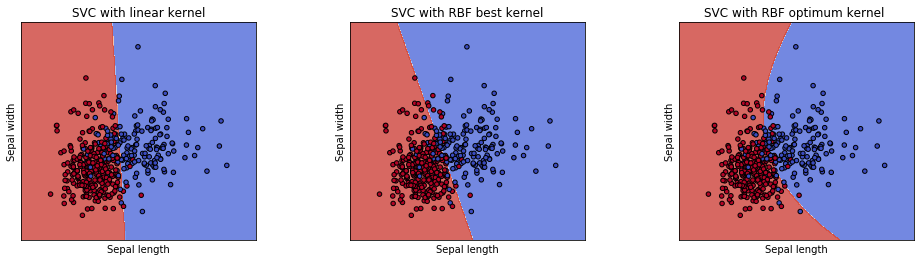

In [11]:
# SVM regularization parameter
plt_models = [worse_model,best_model,random_search]
plt_models = [clf.fit(X_train[:,:2], y_train) for clf in plt_models]

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF best kernel',
          'SVC with RBF optimum kernel ')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 3, figsize = (16,4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(plt_models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Assignment 3 -- Part 2

In this part, you will use decision tree from sklearn to classify non-linearly sperable datasets. 


Load Car Evaluation Data Set from https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data, read the dataset description and get faimilir with the dataset attributes https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names



a. Use decision tree to classify the dataset (evaluate cars to one of the four classes unacc, acc, good, v-good), use cross validation to report your results, you can use sklearn.tree.DecisionTreeClassifier .[25 pts]


In [12]:
#load the data
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
car_data = pd.read_csv(url, names = ['buying','maint','doors','persons','lug_boot','safety','class'])
car_data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [13]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


### Convert data
**buying and maint:** vhigh = 4  high=3  med=2  low=1  
**doors:** 5-more = 6         
**persons:** more =5  
**lug_boot:** small =1   med=2   big=3  
**class:** unacc=1   acc=2  good=3   vgood=4  

In [14]:
#get the features
converted_car_data = copy.deepcopy(car_data)

In [15]:
#data convert from string to number
Data_convert = {'vhigh':4, 'high':3, 'med':2, 'low':1,'5more':6,'more':5,'small':1, 'big':3,'low':1,'high':3
                ,'unacc':1, 'acc':2, 'good':3, 'vgood':4}
for key in Data_convert:
    converted_car_data = converted_car_data.replace(key,Data_convert[key])

### Cross validation for DecisionTreeClassifier

In [16]:
X1 = converted_car_data.iloc[:,:-1].values
y1 = converted_car_data.iloc[:,-1:].values
y1 = y1[:,0]

In [17]:
DT_clf = DecisionTreeClassifier(random_state = 0)
DT_clf = DT_clf.fit(X1,y1)

print('DecisionTreeClassifier',':\n')
y1_pred = cross_val_predict(DT_clf,X1, y1, cv=5)
print(metrics.classification_report(y1, y1_pred))
print(metrics.confusion_matrix(y1, y1_pred))
print()

DecisionTreeClassifier :

             precision    recall  f1-score   support

          1       0.86      0.94      0.90      1210
          2       0.59      0.35      0.44       384
          3       0.47      0.72      0.57        69
          4       0.70      0.78      0.74        65

avg / total       0.78      0.79      0.78      1728

[[1137   69    4    0]
 [ 180  133   52   19]
 [   5   11   50    3]
 [   0   14    0   51]]



b. what is the optimum min_samples_split (The minimum number of samples required to split an internal node), does it make sense? why ?[25 pts]



In [18]:
DT_model = DecisionTreeClassifier()

param_dist = {"min_samples_split": [i for i in range(2,len(y1))]}
grid = GridSearchCV(estimator=DT_model, param_grid=param_dist)
grid.fit(X1,y1)
print('The optimum min_samples_split', end=':')
print(grid.best_estimator_.min_samples_split)

The optimum min_samples_split:2


### Answer:
The optimum min_samples_split is 2 of Grid Search from 2 to length of samples
I think it make sense, because of following reasons:
* If you have no sample of a particular feature, then you dont need to split it. In this case, min_samples_split = 0
* if you have only 1 smaple of a particular feature, which means it already a singe node leaf so you dont need to split it. In this case, min_samples_split = 1

C. (This part for graduate students only): Implement random forest classifer by defining multiple (DecisionTreeClassifier)'s from sklearn, you can use the max_features from DecisionTreeClassifier, compare your results to RandomForestClassifier from sklearn. Note: in this part implement the bagging/ensmble by yourself without calling build-in functions from sklearn (you still can use RandomForestClassifier from sklearn with max_features if you find it needed).[25 pts]

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2, random_state = 0)

### My random forest:

In [20]:
def random_forest(X, y, iter_num = 500, X_test = X):
    """
    parameter: 
        X is the training samples of features.
        y is the training samples of class corresponding to X.
        iter_num is the number of tree to generate.
        X_test is the testing data
        
    Implent the random forest.
    
    return:
        RF_pred is the final result that prediction of X_test.
    """
    clf_forests = []
    y_preds = []
    n_features = len(X[0])
    sample_num = int(len(X)*0.2)
    for i in range(iter_num):
        ran_feature = int(n_features*np.random.random()+1 )#pick a random number of feature.
        #random pick the sample data.
        tra_set = []
        pre_set = []
        for j in range(sample_num):
            ran_ind = int(np.random.random()*sample_num)
            tra_set.append(X[ran_ind])
            pre_set.append(y[ran_ind])  
        tra_set = np.array(tra_set)
        pre_set = np.array(pre_set)
        
        DT_clf = DecisionTreeClassifier(random_state = i, max_features = ran_feature)
        DT_clf = DT_clf.fit(tra_set,pre_set)
        y_pred =  DT_clf.predict(X_test)      #collect the prediction of each decision tree predict of testing data
        y_preds.append(y_pred)
        clf_forests.append(DT_clf)
    y_preds = np.array(y_preds)
    RF_pred = []
    temp = {}
    for pred in y_preds.T:
        temp[list(pred).count(1)] = 1
        temp[list(pred).count(2)] = 2
        temp[list(pred).count(3)] = 3
        temp[list(pred).count(4)] = 4
        max_pred = max(list(pred).count(1),list(pred).count(2),list(pred).count(3),list(pred).count(4))
        RF_pred.append(temp[max_pred])
    RF_pred = np.array(RF_pred)
    return RF_pred

In [21]:
my_RF_pred = random_forest(X1_train,y1_train,iter_num = 500, X_test = X1_test)

print(metrics.classification_report(my_RF_pred , y1_test))
print(metrics.confusion_matrix(my_RF_pred , y1_test))
print()

             precision    recall  f1-score   support

          1       0.95      0.98      0.97       234
          2       0.87      0.82      0.85        84
          3       0.65      0.69      0.67        16
          4       0.80      0.67      0.73        12

avg / total       0.92      0.92      0.92       346

[[229   5   0   0]
 [ 11  69   2   2]
 [  0   5  11   0]
 [  0   0   4   8]]



### Random forest from sklearn

In [22]:
RF_clf = RandomForestClassifier( random_state=0)
RF_clf.fit(X1_train,y1_train)
print('RandomForestClassifier from sklearn',':\n')
y1_pred_rf = RF_clf.predict(X1_test)
print(metrics.classification_report(y1_test, y1_pred_rf))
print(metrics.confusion_matrix(y1_test, y1_pred_rf))
print()

RandomForestClassifier from sklearn :

             precision    recall  f1-score   support

          1       0.98      1.00      0.99       240
          2       0.95      0.89      0.92        79
          3       0.82      0.82      0.82        17
          4       0.73      0.80      0.76        10

avg / total       0.96      0.96      0.96       346

[[239   1   0   0]
 [  5  70   3   1]
 [  0   1  14   2]
 [  0   2   0   8]]

